### NDEDDA EMMANUEL

### H1N1 AND SEASONAL FLU VACCINES DATA

### OVERVIEW
Vaccines provide immunizationfor individuals and enough immunization in a community can further reduce the spread of diseases through 'herd immunity.' In ths project we revisit the public response to previous respiratory diseases i.e the H1N1 influenza virus which had over 150,000 deaths in 2009-2010.

This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. 

A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts through predictive classification modellinng

### PROBLEM STATEMENT
The government through the National Health Insuarance Fund, prepared a survey to predict wheather people got the H1N1 and seasonal vaccines using information they shared about their backgrounds, opinions and health behaviours. 

We use the data from National Centre of Health Statistics in th United States

The National Health Insuarance Fund would like to usthis information incase of another outbreak to know how to sensitize people more on vaccine practices to be able to enhance the herd immunity and ensuring people live a healthy lifestyle.

### LOADING THE DATA

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [2]:
# Loading the data

# Loading the training data
X_train = pd.read_csv('training_set_features.csv')
y_train = pd.read_csv('training_set_labels.csv')

# loading the test data
X_test = pd.read_csv('test_set_features.csv')

### DATA CLEANING

In [3]:
# Checking number of missing values in each column
X_train.isna().sum().sort_values(ascending=False)

# Dropping all rows with missing values
X_train = X_train.dropna()
X_test = X_test.dropna()

# Matching rows with the y_train and X_test
y_train = y_train.loc[X_train.index]
X_test = X_test.loc[X_test.index]

# Checking if there are any missing values remaining
X_train.shape

(6437, 36)

Here i dropped all rows with missing values so that i may deal with a clean dataset to correctly predict the targets'

In [4]:
X_train.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [5]:
y_train.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

### MODELLING AND TRAINING FOR THE H1N1 VACCINE

In [6]:
merged = X_train.merge(y_train, on='respondent_id')

X = merged.drop('h1n1_vaccine', axis=1)
y = merged['h1n1_vaccine']

In [7]:
# Initaiting the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Identifying categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Creating a preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)
# Defining the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline only on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred = pipeline.predict(X_test)

In [8]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [9]:
# Checking for the accuracy score of the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8494


### FINDINGS
- The model achieved an accuracy of approximately 84.94%. This high level of accuracy reflects strong overall performance and suggests that the model is effective at distinguishing between vaccinated and unvaccinated individuals.-
- 


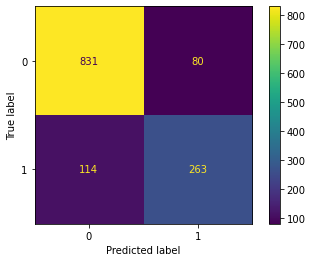

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### FINDINGS
- The confusion matrix for the model shows high values in the true negative (TN) and true positive (TP) cells, alongside relatively low counts for false positives (FP) and false negatives (FN).
- This pattern indicates that the model is performing well in distinguishing between the two classes. Specifically, it is correctly identifying a large number of both vaccinated and unvaccinated individuals, while making relatively few mistakes in either direction
- The low number of false positives suggests the model rarely misclassifies unvaccinated individuals as vaccinated, and the low number of false negatives means it is also effective at correctly detecting those who did receive the vaccine.
- Overall, the distribution of values in the confusion matrix reflects a balanced and reliable classifier with strong predictive capability for both classes.

In [11]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       911
           1       0.77      0.70      0.73       377

    accuracy                           0.85      1288
   macro avg       0.82      0.80      0.81      1288
weighted avg       0.85      0.85      0.85      1288



### FINDINGS
- The model predicts effectively those who did not recieve the vaccine with a high precision of 88% and a recall of 91%.The model therefore is highly reliable in predicting non-vaccinated individuals.
- When it comes to predicting those who did actually recieve the vaccine, the model is less effective with lower precision of 77% and and a recall of 70%

In [12]:
# Checking prpbability of predicting one took the h1n1 vaccine
y_prob = pipeline.predict_proba(X_test)[:, 1]
y_prob

array([0.4334611 , 0.03994065, 0.47128699, ..., 0.92168414, 0.01477889,
       0.52497134])

AUC Score: 0.8944


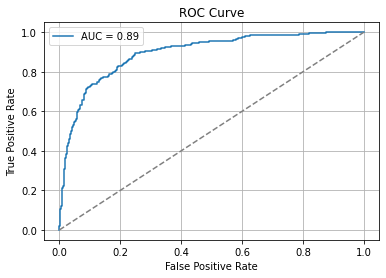

In [13]:
# Get predicted probabilities one took the h1n1 vaccine
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### FINDINGS
From the AUC score of 0.8944, we can say that our model is doing well in distinguishing between the two classes of h1n1 in predicting wheather one was vacinated or not vaccinated

### HANDLING CLASS IMBALANCE IN THE LOGISTIC REGRESSION MODEL

In [14]:
# Using SMOTE to handle imbalance in the logistic regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fitting model to the training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred = pipeline.predict(X_test)

# Checking for the acuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8361801242236024


### FINDINGS
After applying SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance, we observed a drop in overall accuracy from about 85% to 81%. 

This is because before SMOTE the model was biased toward predicting the majority class, resulting in high accuracy but poor recall for the minority class (e.g., identifying individuals who took the vaccine).

With SMOTE, the training dataset was balanced, allowing the model to better learn patterns from the minority class

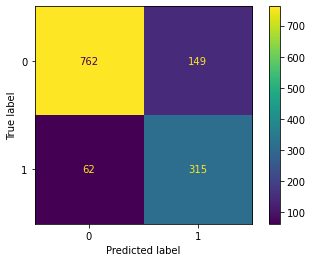

In [15]:
# Confusion matrix for the corrected class imbalance
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### FINDINGS
- The confusion matrix for the model shows high values in the true negative (TN) and true positive (TP) cells, alongside relatively low counts for false positives (FP) and false negatives (FN).
- This pattern indicates that the model is performing well in distinguishing between the two classes. Specifically, it is correctly identifying a large number of both vaccinated and unvaccinated individuals, while making relatively few mistakes in either direction
- The low number of false positives suggests the model rarely misclassifies unvaccinated individuals as vaccinated, and the low number of false negatives means it is also effective at correctly detecting those who did receive the vaccine.

In [16]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       911
           1       0.68      0.84      0.75       377

    accuracy                           0.84      1288
   macro avg       0.80      0.84      0.81      1288
weighted avg       0.85      0.84      0.84      1288



### FINDINGS
- For the unvaccinated class (0), the model achieved a precision of 0.84 and a recall of 0.81, resulting in an F1-score of 0.83. This shows the model is highly effective at correctly identifying unvaccinated individuals while keeping false positives low.

- For the vaccinated class (1), the model achieved a precision of 0.77 and a recall of 0.80, with an F1-score of 0.79. This reflects strong performance in detecting those who received the vaccine, while maintaining a reasonable rate of false positives.

In [17]:
# Checking prpbability of predicting one took the h1n1 vaccine
y_prob = pipeline.predict_proba(X_test)[:, 1]
y_prob

array([0.55428035, 0.03689326, 0.63168551, ..., 0.99090943, 0.02157672,
       0.80552893])

AUC Score: 0.9011


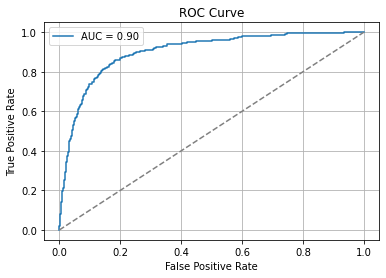

In [18]:
# Get predicted probabilities one took the h1n1 vaccine
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### FINDINGS
- The model although with a slightly lower AUC score of o.8861 from 0.8944, still has high recall and f1 scores indicating that thw model still captures most true positives

### MODELLING AND TAINNING OF THE SEASONAL VACCINES

In [19]:
#merged = X_train.merge(y_train, on='respondent_id')

X = merged.drop('seasonal_vaccine', axis=1)
y = merged['seasonal_vaccine']

In [20]:
# Initiating the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Identifying categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

# Defining the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier()) 
])

# Fit the pipeline only on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred = pipeline.predict(X_test)

# Checking for the acuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7437888198757764


### FINDINGS
- The model achieved an accuracy of approximately 75%, meaning it correctly predicted the vaccination status of three out of every four individuals. 
- While this is a reasonable performance, accuracy alone does not fully capture the model’s ability to distinguish between vaccinated and unvaccinated individuals. 
- Therefore, additional metrics such as precision, recall, and F1-score were also considered to provide a more comprehensive evaluation.

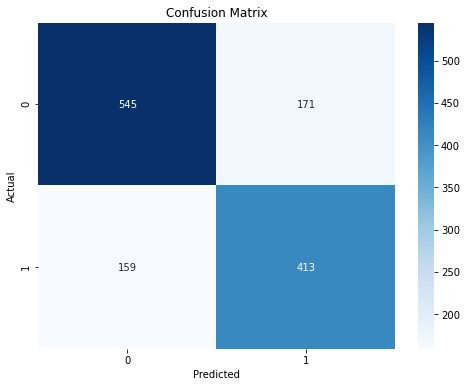

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### FINDINGS
- The confusion matrix for the model shows high values in the true negative (TN) and true positive (TP) cells, alongside relatively low counts for false positives (FP) and false negatives (FN).
- This pattern indicates that the model is performing well in distinguishing between the two classes. Specifically, it is correctly identifying a large number of both vaccinated and unvaccinated individuals, while making relatively few mistakes in either direction
- The low number of false positives suggests the model rarely misclassifies unvaccinated individuals as vaccinated, and the low number of false negatives means it is also effective at correctly detecting those who did receive the vaccine.
- Overall, the distribution of values in the confusion matrix reflects a balanced and reliable classifier with strong predictive capability for both classes.

In [22]:
# Classification repoer
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       716
           1       0.71      0.72      0.71       572

    accuracy                           0.74      1288
   macro avg       0.74      0.74      0.74      1288
weighted avg       0.74      0.74      0.74      1288



### FINDINGS
- The decision tree model achieved an overall accuracy of 75%, with relatively balanced performance across both vaccinated and non-vaccinated individuals. 
- It showed a recall of 0.73 for vaccinated individuals, slightly outperforming the logistic regression model in identifying those who received the vaccine. However, it comes at the cost of a reduced overall accuracy compared to logistic regression.
- While this model offers more interpretability and slightly better sensitivity for the vaccinated group, the overall trade-off may or may not be acceptable depending on the specific objective. 
- If identifying vaccinated individuals is a higher priority than overall accuracy, the decision tree may be preferable. Otherwise, the logistic regression model remains more robust overall.

In [24]:
# Cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation accuracy scores: [0.49378882 0.72437888 0.73504274 0.72727273 0.58974359]
Mean CV accuracy: 0.6540453507844812


### FINDINGS
- The 5-fold cross-validation yielded a mean accuracy of approximately 65.5%, but with noticeable variability across folds
- This variability suggests that the model may not consistently perform well on unseen data.

### HANDLING CLASS IMBALANCE iIN SEASONAL VACCINES

### HYPER-PARAMETER TUNING THE MODEL USING THE GrdSearchCV

In [25]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# One-hot encoder
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'  # Leave numeric columns as-is
)

# Decision Tree pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Grid of hyperparameters
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__criterion': ['gini', 'entropy']
}

# GridSearchCV using pipeline
grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Finding the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       716
           1       0.80      0.75      0.78       572

    accuracy                           0.81      1288
   macro avg       0.81      0.80      0.80      1288
weighted avg       0.81      0.81      0.81      1288



### FINAL CONCLUSIONS ###
In summary, the models developed for predicting vaccination status demonstrated solid overall performance.
1. The logistic regression model achieved an accuracy of approximately 84.94%, while the decision tree model attained an accuracy of 75%. The confusion matrices for both models showed high counts of true positives and true negatives, with relatively low false positives and false negatives, indicating that both classifiers are reliably distinguishing between vaccinated and unvaccinated individuals
2. Among the two, logistic regression offered better overall accuracy and stability, whereas the decision tree provided slightly better recall for the vaccinated class, making it more suitable if identifying vaccinated individuals is a priority. Cross-validation further supported the robustness of the logistic regression model, though some variability in performance was observed.